final project link: https://colab.research.google.com/gist/CunrongLiu/a85bbacdfd99e28826f86c7329e3ef67/cunrong-liu.ipynb



**Table 1**

In [1]:
#import table 1 and skip the tital rows
import pandas as pd
t1 = pd.read_excel("/content/UN_MigrantStockTotal_2015.xlsx",sheet_name="Table 1",skiprows= 14)
t1.head()

,Sort\norder,"Major area, region, country or area of destination",Notes,Country code,Type of data (a),International migrant stock at mid-year (both sexes),Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,International migrant stock at mid-year (female),Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22
0,NaN,NaN,NaN,NaN,NaN,1990,1995,2000,2005,2010,...,2000,2005,2010,2015,1990,1995,2000,2005,2010,2015
1,1.0,WORLD,NaN,900.0,NaN,152563212,160801752,172703309,191269100,221714243,...,87884839,97866674,114613714,126115435,74815702,79064275,84818470,93402426,107100529,117584801
2,2.0,Developed regions,(b),901.0,NaN,82378628,92306854,103375363,117181109,132560325,...,50536796,57217777,64081077,67618619,42115231,47214055,52838567,59963332,68479248,72863336
3,3.0,Developing regions,(c),902.0,NaN,70184584,68494898,69327946,74087991,89153918,...,37348043,40648897,50532637,58496816,32700471,31850220,31979903,33439094,38621281,44721465
4,4.0,Least developed countries,(d),941.0,NaN,11075966,11711703,10077824,9809634,10018128,...,5361902,5383009,5462714,6463217,5236216,5573685,4721920,4432371,4560536,5493028


In [2]:
#Add column names and drop unnamed colunm
t=t1
t.drop(t.index[0], inplace = True)
t.columns = ['Sort\norder', 'Major area, region, country or area of destination', 'Notes', 'Country code', 'Type of data (a)', 
                   '1990Both sex','1995Both sex','2000Both sex','2005Both sex','2010Both sex','2015Both sex',
                   '1990Male','1995Male','2000Male','2005Male','2010Male','2015Male',
                   '1990Female','1995Female','2000Female','2005Female','2010Female','2015Female'
                   ]
t.head()


,Sort\norder,"Major area, region, country or area of destination",Notes,Country code,Type of data (a),1990Both sex,1995Both sex,2000Both sex,2005Both sex,2010Both sex,...,2000Male,2005Male,2010Male,2015Male,1990Female,1995Female,2000Female,2005Female,2010Female,2015Female
1,1.0,WORLD,NaN,900.0,NaN,152563212,160801752,172703309,191269100,221714243,...,87884839,97866674,114613714,126115435,74815702,79064275,84818470,93402426,107100529,117584801
2,2.0,Developed regions,(b),901.0,NaN,82378628,92306854,103375363,117181109,132560325,...,50536796,57217777,64081077,67618619,42115231,47214055,52838567,59963332,68479248,72863336
3,3.0,Developing regions,(c),902.0,NaN,70184584,68494898,69327946,74087991,89153918,...,37348043,40648897,50532637,58496816,32700471,31850220,31979903,33439094,38621281,44721465
4,4.0,Least developed countries,(d),941.0,NaN,11075966,11711703,10077824,9809634,10018128,...,5361902,5383009,5462714,6463217,5236216,5573685,4721920,4432371,4560536,5493028
5,5.0,Less developed regions excluding least develop...,NaN,934.0,NaN,59105261,56778501,59244124,64272611,79130668,...,31986141,35265888,45069923,52033599,27464255,26276535,27257983,29006723,34060745,39228437


In [3]:
#melt
t1B = t.melt(id_vars=["Sort\norder", "Major area, region, country or area of destination", "Country code", "Notes","Type of data (a)"],
                     var_name = ["YearwithGender"], value_name = 'International migrant stock at mid-year')
t1B.head()

,Sort\norder,"Major area, region, country or area of destination",Country code,Notes,Type of data (a),YearwithGender,International migrant stock at mid-year
0,1.0,WORLD,900.0,NaN,NaN,1990Both sex,152563212
1,2.0,Developed regions,901.0,(b),NaN,1990Both sex,82378628
2,3.0,Developing regions,902.0,(c),NaN,1990Both sex,70184584
3,4.0,Least developed countries,941.0,(d),NaN,1990Both sex,11075966
4,5.0,Less developed regions excluding least develop...,934.0,NaN,NaN,1990Both sex,59105261


In [4]:
# Create new column，year and gender
tb1 = (t1B.assign(Year = lambda x : x.YearwithGender.str[0:4].astype(str),Gender = lambda x : x.YearwithGender.str[4:].astype(str)))
tb1
tb1= tb1.drop('YearwithGender',axis=1)
tb1.head()


,Sort\norder,"Major area, region, country or area of destination",Country code,Notes,Type of data (a),International migrant stock at mid-year,Year,Gender
0,1.0,WORLD,900.0,NaN,NaN,152563212,1990,Both sex
1,2.0,Developed regions,901.0,(b),NaN,82378628,1990,Both sex
2,3.0,Developing regions,902.0,(c),NaN,70184584,1990,Both sex
3,4.0,Least developed countries,941.0,(d),NaN,11075966,1990,Both sex
4,5.0,Less developed regions excluding least develop...,934.0,NaN,NaN,59105261,1990,Both sex


**Table 2**


In [5]:
#import table 2 and skip the tital rows
import pandas as pd
t2 = pd.read_excel("/content/UN_MigrantStockTotal_2015.xlsx",sheet_name="Table 2",skiprows= 14)
t2.head()

,Sort\norder,"Major area, region, country or area of destination",Notes,Country code,Total population of both sexes at mid-year (thousands),Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Total female population at mid-year (thousands),Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21
0,NaN,NaN,NaN,NaN,1990.000,1995.000,2000.000,2005.000,2010.000,2015.000,...,2000,2005,2010,2015,1990,1995,2000,2005,2010,2015
1,1.0,WORLD,NaN,900.0,5309667.699,5735123.084,6126622.121,6519635.850,6929725.043,7349472.099,...,3084537.662,3285082.249,3493956.904,3707205.753,2639243.998,2848487.191,3042084.459,3234553.601,3435768.139,3642266.346
2,2.0,Developed regions,(b),901.0,1144463.062,1169761.211,1188811.731,1208919.509,1233375.711,1251351.086,...,578010.218,587962.213,599955.476,609297.148,589207.436,601492.755,610801.513,620957.296,633420.235,642053.938
3,3.0,Developing regions,(c),902.0,4165204.637,4565361.873,4937810.390,5310716.341,5696349.332,6098121.013,...,2506527.444,2697120.036,2894001.428,3097908.605,2050036.562,2246994.436,2431282.946,2613596.305,2802347.904,3000212.408
4,4.0,Least developed countries,(d),941.0,510057.629,585189.354,664386.087,752804.951,847254.847,954157.804,...,331482.475,375757.715,422397.532,476031.179,256015.073,293162.612,332903.612,377047.236,424857.315,478126.625


In [6]:
#Add column names 
tpop= t2
tpop.columns = ['Sort\norder', 'Major area, region, country or area of destination', 'Notes', 'Country code', 
                   '1990Both sex','1995Both sex','2000Both sex','2005Both sex','2010Both sex','2015Both sex',
                   '1990Male','1995Male','2000Male','2005Male','2010Male','2015Male',
                   '1990Female','1995Female','2000Female','2005Female','2010Female','2015Female']
tpop.drop(tpop.index[0], inplace = True)
tpop.head()
                

,Sort\norder,"Major area, region, country or area of destination",Notes,Country code,1990Both sex,1995Both sex,2000Both sex,2005Both sex,2010Both sex,2015Both sex,...,2000Male,2005Male,2010Male,2015Male,1990Female,1995Female,2000Female,2005Female,2010Female,2015Female
1,1.0,WORLD,NaN,900.0,5309667.699,5735123.084,6126622.121,6519635.850,6929725.043,7349472.099,...,3084537.662,3285082.249,3493956.904,3707205.753,2639243.998,2848487.191,3042084.459,3234553.601,3435768.139,3642266.346
2,2.0,Developed regions,(b),901.0,1144463.062,1169761.211,1188811.731,1208919.509,1233375.711,1251351.086,...,578010.218,587962.213,599955.476,609297.148,589207.436,601492.755,610801.513,620957.296,633420.235,642053.938
3,3.0,Developing regions,(c),902.0,4165204.637,4565361.873,4937810.390,5310716.341,5696349.332,6098121.013,...,2506527.444,2697120.036,2894001.428,3097908.605,2050036.562,2246994.436,2431282.946,2613596.305,2802347.904,3000212.408
4,4.0,Least developed countries,(d),941.0,510057.629,585189.354,664386.087,752804.951,847254.847,954157.804,...,331482.475,375757.715,422397.532,476031.179,256015.073,293162.612,332903.612,377047.236,424857.315,478126.625
5,5.0,Less developed regions excluding least develop...,NaN,934.0,3655147.008,3980172.519,4273424.303,4557911.390,4849094.485,5143963.209,...,2175044.969,2321362.321,2471603.896,2621877.426,1794021.489,1953831.824,2098379.334,2236549.069,2377490.589,2522085.783


In [7]:
#melt
tpop1 = tpop.melt(id_vars=["Sort\norder", "Major area, region, country or area of destination","Notes", "Country code"],
                     var_name = ["YearwithGender"], value_name = 'Total Population at mid-year(thousands)')
tpop1.head()

,Sort\norder,"Major area, region, country or area of destination",Notes,Country code,YearwithGender,Total Population at mid-year(thousands)
0,1.0,WORLD,NaN,900.0,1990Both sex,5309667.699
1,2.0,Developed regions,(b),901.0,1990Both sex,1144463.062
2,3.0,Developing regions,(c),902.0,1990Both sex,4165204.637
3,4.0,Least developed countries,(d),941.0,1990Both sex,510057.629
4,5.0,Less developed regions excluding least develop...,NaN,934.0,1990Both sex,3655147.008


In [8]:
# Create new column，year and gender
tpop2 = (tpop1.assign(Year = lambda x : x.YearwithGender.str[0:4].astype(str),Gender = lambda x : x.YearwithGender.str[4:].astype(str)))
tpop2
tpop2= tpop2.drop('YearwithGender',axis=1)
tpop2.head()

,Sort\norder,"Major area, region, country or area of destination",Notes,Country code,Total Population at mid-year(thousands),Year,Gender
0,1.0,WORLD,NaN,900.0,5309667.699,1990,Both sex
1,2.0,Developed regions,(b),901.0,1144463.062,1990,Both sex
2,3.0,Developing regions,(c),902.0,4165204.637,1990,Both sex
3,4.0,Least developed countries,(d),941.0,510057.629,1990,Both sex
4,5.0,Less developed regions excluding least develop...,NaN,934.0,3655147.008,1990,Both sex


**Table 3**

In [9]:
#import table 3 and skip the tital rows
import pandas as pd
t3 = pd.read_excel("/content/UN_MigrantStockTotal_2015.xlsx",sheet_name="Table 3",skiprows= 14)
t3.head()

,Sort\norder,"Major area, region, country or area of destination",Notes,Country code,Type of data (a),International migrant stock as a percentage of the total population (both sexes),Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,International migrant stock as a percentage of the total population (female),Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22
0,NaN,NaN,NaN,NaN,NaN,1990,1995,2000,2005,2010.000000,...,2000,2005,2010,2015,1990,1995,2000,2005,2010,2015
1,1.0,WORLD,NaN,900.0,NaN,2.87331,2.803806,2.818899,2.933739,3.199467,...,2.849206,2.979124,3.280341,3.4019,2.83474,2.775658,2.788169,2.887645,3.117222,3.228342
2,2.0,Developed regions,(b),901.0,NaN,7.198015,7.891085,8.695688,9.693045,10.747765,...,8.743236,9.73154,10.680972,11.097807,7.147777,7.84948,8.650694,9.656595,10.811029,11.348476
3,3.0,Developing regions,(c),902.0,NaN,1.685021,1.500317,1.404022,1.395066,1.565106,...,1.490031,1.507122,1.746117,1.888268,1.595116,1.417459,1.315351,1.279428,1.378176,1.49061
4,4.0,Least developed countries,(d),941.0,NaN,2.171513,2.001353,1.516863,1.303078,1.182422,...,1.617552,1.432574,1.293264,1.35773,2.045276,1.901226,1.418405,1.175548,1.073428,1.148865


In [10]:
#Add column names 
tper= t3
tper.columns = ['Sort\norder', 'Major area, region, country or area of destination', 'Notes', 'Country code', 'Type of data (a)',
                   '1990Both sex','1995Both sex','2000Both sex','2005Both sex','2010Both sex','2015Both sex',
                   '1990Male','1995Male','2000Male','2005Male','2010Male','2015Male',
                   '1990Female','1995Female','2000Female','2005Female','2010Female','2015Female']
tper.drop(tper.index[0], inplace = True)
tper.head()

,Sort\norder,"Major area, region, country or area of destination",Notes,Country code,Type of data (a),1990Both sex,1995Both sex,2000Both sex,2005Both sex,2010Both sex,...,2000Male,2005Male,2010Male,2015Male,1990Female,1995Female,2000Female,2005Female,2010Female,2015Female
1,1.0,WORLD,NaN,900.0,NaN,2.87331,2.803806,2.818899,2.933739,3.199467,...,2.849206,2.979124,3.280341,3.4019,2.83474,2.775658,2.788169,2.887645,3.117222,3.228342
2,2.0,Developed regions,(b),901.0,NaN,7.198015,7.891085,8.695688,9.693045,10.747765,...,8.743236,9.73154,10.680972,11.097807,7.147777,7.84948,8.650694,9.656595,10.811029,11.348476
3,3.0,Developing regions,(c),902.0,NaN,1.685021,1.500317,1.404022,1.395066,1.565106,...,1.490031,1.507122,1.746117,1.888268,1.595116,1.417459,1.315351,1.279428,1.378176,1.49061
4,4.0,Least developed countries,(d),941.0,NaN,2.171513,2.001353,1.516863,1.303078,1.182422,...,1.617552,1.432574,1.293264,1.35773,2.045276,1.901226,1.418405,1.175548,1.073428,1.148865
5,5.0,Less developed regions excluding least develop...,NaN,934.0,NaN,1.617042,1.426534,1.386338,1.410133,1.631865,...,1.470597,1.519189,1.823509,1.984593,1.530877,1.344872,1.299002,1.296941,1.432634,1.555397


In [11]:
#melt
tper1 = tper.melt(id_vars=["Sort\norder", "Major area, region, country or area of destination","Notes", "Country code","Type of data (a)"],
                     var_name = ["YearwithGender"], value_name = 'International migrant stock as a percentage of the total population ')
tper1.head()

,Sort\norder,"Major area, region, country or area of destination",Notes,Country code,Type of data (a),YearwithGender,International migrant stock as a percentage of the total population
0,1.0,WORLD,NaN,900.0,NaN,1990Both sex,2.87331
1,2.0,Developed regions,(b),901.0,NaN,1990Both sex,7.198015
2,3.0,Developing regions,(c),902.0,NaN,1990Both sex,1.685021
3,4.0,Least developed countries,(d),941.0,NaN,1990Both sex,2.171513
4,5.0,Less developed regions excluding least develop...,NaN,934.0,NaN,1990Both sex,1.617042


In [12]:
# Create new column，year and gender
tper2 = (tper1.assign(Year = lambda x : x.YearwithGender.str[0:4].astype(str),Gender = lambda x : x.YearwithGender.str[4:].astype(str)))
tper2
tper2= tper2.drop('YearwithGender',axis=1)
tper2.head()

,Sort\norder,"Major area, region, country or area of destination",Notes,Country code,Type of data (a),International migrant stock as a percentage of the total population,Year,Gender
0,1.0,WORLD,NaN,900.0,NaN,2.87331,1990,Both sex
1,2.0,Developed regions,(b),901.0,NaN,7.198015,1990,Both sex
2,3.0,Developing regions,(c),902.0,NaN,1.685021,1990,Both sex
3,4.0,Least developed countries,(d),941.0,NaN,2.171513,1990,Both sex
4,5.0,Less developed regions excluding least develop...,NaN,934.0,NaN,1.617042,1990,Both sex


**Table 4**

In [13]:
#import table 4 and skip the tital rows
import pandas as pd
t4 = pd.read_excel("/content/UN_MigrantStockTotal_2015.xlsx",sheet_name="Table 4",skiprows= 14)
t4.head()

,Sort\norder,"Major area, region, country or area of destination",Notes,Country code,Type of data (a),Female migrants as a percentage of the international migrant stock,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10
0,NaN,NaN,NaN,NaN,NaN,1990,1995,2000,2005,2010.000000,2015.000000
1,1.0,WORLD,NaN,900.0,NaN,49.03915,49.16879,49.112244,48.832993,48.305660,48.249769
2,2.0,Developed regions,(b),901.0,NaN,51.123977,51.149024,51.113307,51.171501,51.658932,51.866687
3,3.0,Developing regions,(c),902.0,NaN,46.592099,46.500135,46.128444,45.134297,43.319780,43.327078
4,4.0,Least developed countries,(d),941.0,NaN,47.261155,47.571664,46.826689,45.157406,45.499573,45.942752


In [14]:
#Add column names and drop unnamed colunm
tFM= t4
tFM.columns = ['Sort\norder', 'Major area, region, country or area of destination', 'Notes', 'Country code', 'Type of data (a)',
                   '1990Female','1995Female','2000Female','2005Female','2010Female','2015Female']
tFM.drop(tFM.index[0], inplace = True)
tFM = tFM.drop(tFM.columns[[2,4]], axis=1)
tFM.head()                   

,Sort\norder,"Major area, region, country or area of destination",Country code,1990Female,1995Female,2000Female,2005Female,2010Female,2015Female
1,1.0,WORLD,900.0,49.03915,49.16879,49.112244,48.832993,48.305660,48.249769
2,2.0,Developed regions,901.0,51.123977,51.149024,51.113307,51.171501,51.658932,51.866687
3,3.0,Developing regions,902.0,46.592099,46.500135,46.128444,45.134297,43.319780,43.327078
4,4.0,Least developed countries,941.0,47.261155,47.571664,46.826689,45.157406,45.499573,45.942752
5,5.0,Less developed regions excluding least develop...,934.0,46.466684,46.279022,46.009598,45.130768,43.043672,42.984398


In [15]:
#melt
tFM1 = tFM.melt(id_vars=["Sort\norder", "Major area, region, country or area of destination", "Country code"],
                     var_name = ["YearwithGender"], value_name = 'Female migrants as a percentge of the internation migrant stock')
tFM1.head()

,Sort\norder,"Major area, region, country or area of destination",Country code,YearwithGender,Female migrants as a percentge of the internation migrant stock
0,1.0,WORLD,900.0,1990Female,49.03915
1,2.0,Developed regions,901.0,1990Female,51.123977
2,3.0,Developing regions,902.0,1990Female,46.592099
3,4.0,Least developed countries,941.0,1990Female,47.261155
4,5.0,Less developed regions excluding least develop...,934.0,1990Female,46.466684


In [16]:
# Create new column，year and gender
tFM2 = (tFM1.assign(Year = lambda x : x.YearwithGender.str[0:4].astype(str),Gender = lambda x : x.YearwithGender.str[4:].astype(str)))
tFM2
tFM2= tFM2.drop('YearwithGender',axis=1)
tFM2.head()

,Sort\norder,"Major area, region, country or area of destination",Country code,Female migrants as a percentge of the internation migrant stock,Year,Gender
0,1.0,WORLD,900.0,49.03915,1990,Female
1,2.0,Developed regions,901.0,51.123977,1990,Female
2,3.0,Developing regions,902.0,46.592099,1990,Female
3,4.0,Least developed countries,941.0,47.261155,1990,Female
4,5.0,Less developed regions excluding least develop...,934.0,46.466684,1990,Female


**Table 5**

In [17]:
#import table 5 and skip the tital rows
import pandas as pd
t5 = pd.read_excel("/content/UN_MigrantStockTotal_2015.xlsx",sheet_name="Table 5",skiprows= 14)
t5.head()

,Sort\norder,"Major area, region, country or area of destination",Notes,Country code,Type of data (a),Annual rate of change of the migrant stock (both sexes),Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Annual rate of change of the migrant stock (male),Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Annual rate of change of the migrant stock (female),Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19
0,NaN,NaN,NaN,NaN,NaN,1990-1995,1995-2000,2000-2005,2005-2010,2010-2015,1990-1995,1995-2000,2000-2005,2005-2010,2010-2015,1990-1995,1995-2000,2000-2005,2005-2010,2010-2015
1,1.0,WORLD,NaN,900.0,NaN,1.051865,1.428058,2.042124,2.95416,1.890991,1.000922,1.450294,2.151575,3.159228,1.912603,1.104667,1.405044,1.92808,2.737012,1.867837
2,2.0,Developed regions,(b),901.0,NaN,2.275847,2.264965,2.50708,2.466343,1.160824,2.265595,2.279583,2.483259,2.265689,1.074685,2.285643,2.250995,2.529838,2.65595,1.241097
3,3.0,Developing regions,(c),902.0,NaN,-0.487389,0.241777,1.328107,3.702217,2.929634,-0.45298,0.380246,1.693824,4.352954,2.927058,-0.526904,0.081268,0.89236,2.881555,2.933003
4,4.0,Least developed countries,(d),941.0,NaN,1.118175,-3.001139,-0.539636,0.419137,3.526927,1.000073,-2.718952,0.078575,0.293964,3.363629,1.249146,-3.316818,-1.265617,0.57011,3.72079


In [18]:
#Add column names and drop unnamed colunm
tAR= t5
tAR.columns = ['Sort\norder', 'Major area, region, country or area of destination', 'Notes', 'Country code', 'Type of data (a)',
                   '1990-1995Both sex','1995-2000Both sex','2000-2005Both sex','2005-2010Both sex','2010-2015Both sex',
                   '1990-1995Male','1995-2000Male','2000-2005Male','2005-2010Male','2010-2015Male',
                   '1990-1995Female','1995-2000Female','2000-2005Female','2005-2010Female','2010-2015Female']
tAR.drop(tAR.index[0], inplace = True)
tAR = tAR.drop(tAR.columns[[2,4]], axis=1)
tAR.head()

,Sort\norder,"Major area, region, country or area of destination",Country code,1990-1995Both sex,1995-2000Both sex,2000-2005Both sex,2005-2010Both sex,2010-2015Both sex,1990-1995Male,1995-2000Male,2000-2005Male,2005-2010Male,2010-2015Male,1990-1995Female,1995-2000Female,2000-2005Female,2005-2010Female,2010-2015Female
1,1.0,WORLD,900.0,1.051865,1.428058,2.042124,2.95416,1.890991,1.000922,1.450294,2.151575,3.159228,1.912603,1.104667,1.405044,1.92808,2.737012,1.867837
2,2.0,Developed regions,901.0,2.275847,2.264965,2.50708,2.466343,1.160824,2.265595,2.279583,2.483259,2.265689,1.074685,2.285643,2.250995,2.529838,2.65595,1.241097
3,3.0,Developing regions,902.0,-0.487389,0.241777,1.328107,3.702217,2.929634,-0.45298,0.380246,1.693824,4.352954,2.927058,-0.526904,0.081268,0.89236,2.881555,2.933003
4,4.0,Least developed countries,941.0,1.118175,-3.001139,-0.539636,0.419137,3.526927,1.000073,-2.718952,0.078575,0.293964,3.363629,1.249146,-3.316818,-1.265617,0.57011,3.72079
5,5.0,Less developed regions excluding least develop...,934.0,-0.803244,0.850177,1.62934,4.159339,2.852687,-0.733256,0.950231,1.952269,4.90598,2.87349,-0.88418,0.733402,1.243624,3.212358,2.825127


In [19]:
#melt
tAR1 = tAR.melt(id_vars=["Sort\norder", "Major area, region, country or area of destination", "Country code"],
                     var_name = ["YearwithGender"], value_name = 'Annal rate of change of the migrant stock')
tAR1.head()

,Sort\norder,"Major area, region, country or area of destination",Country code,YearwithGender,Annal rate of change of the migrant stock
0,1.0,WORLD,900.0,1990-1995Both sex,1.051865
1,2.0,Developed regions,901.0,1990-1995Both sex,2.275847
2,3.0,Developing regions,902.0,1990-1995Both sex,-0.487389
3,4.0,Least developed countries,941.0,1990-1995Both sex,1.118175
4,5.0,Less developed regions excluding least develop...,934.0,1990-1995Both sex,-0.803244


In [20]:
# Create new column，year and gender
tAR2 = (tAR1.assign(Year = lambda x : x.YearwithGender.str[0:9].astype(str),Gender = lambda x : x.YearwithGender.str[9:].astype(str)))
tAR2
tAR2= tAR2.drop('YearwithGender',axis=1)
tAR2.head()

,Sort\norder,"Major area, region, country or area of destination",Country code,Annal rate of change of the migrant stock,Year,Gender
0,1.0,WORLD,900.0,1.051865,1990-1995,Both sex
1,2.0,Developed regions,901.0,2.275847,1990-1995,Both sex
2,3.0,Developing regions,902.0,-0.487389,1990-1995,Both sex
3,4.0,Least developed countries,941.0,1.118175,1990-1995,Both sex
4,5.0,Less developed regions excluding least develop...,934.0,-0.803244,1990-1995,Both sex


**Table 6**

In [21]:
#import table 6 and skip the tital rows
import pandas as pd
t6 = pd.read_excel("/content/UN_MigrantStockTotal_2015.xlsx",sheet_name="Table 6",skiprows= 14)
t6.head()

,Sort\norder,"Major area, region, country or area of destination",Notes,Country code,Type of data (a),Estimated refugee stock at mid-year (both sexes),Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Annual rate of change of the refugee stock,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21
0,NaN,NaN,NaN,NaN,NaN,1990,1995,2000,2005,2010,...,1995,2000,2005,2010.000000,2015.000000,1990-1995,1995-2000,2000-2005,2005-2010,2010-2015
1,1.0,WORLD,NaN,900.0,NaN,18836571,17853840,15827803,13276733,15370755,...,11.103013,9.164736,6.941389,6.932687,8.033424,-2.123497,-3.837069,-5.557223,-0.025089,2.947267
2,2.0,Developed regions,(b),901.0,NaN,2014564,3609670,2997256,2361229,2046917,...,3.910511,2.899391,2.015025,1.544140,1.391085,9.388424,-5.983348,-7.277379,-5.323293,-2.087656
3,3.0,Developing regions,(c),902.0,NaN,16822007,14244170,12830547,10915504,13323838,...,20.795958,18.507035,14.733162,14.944759,17.073768,-2.839417,-2.332154,-4.561,0.285195,2.663652
4,4.0,Least developed countries,(d),941.0,NaN,5048391,5160131,3047488,2363782,1957884,...,44.041961,30.221557,24.08243,19.533425,28.801534,-0.680327,-7.531747,-4.541459,-4.187109,7.766031


In [22]:
#Add column names
tEf= t6
tEf.columns = ['Sort\norder', 'Major area, region, country or area of destination', 'Notes', 'Country code', 'Type of data (a)',
                     '1990both sex','1995both sex','2000both sex','2005both sex','2010both sex','2015both sex',
                     '1990Re','1995Re','2000Re','2005Re','2010Re','2015Re',
                     '1990-1995An','1995-2000An','2000-2005An','2005-2010An','2010-2015An'
                   ]
tEf.drop(tEf.index[0], inplace = True)
tEf = tEf.drop(tEf.columns[[2,4]], axis=1)
tEf.head()                 

,Sort\norder,"Major area, region, country or area of destination",Country code,1990both sex,1995both sex,2000both sex,2005both sex,2010both sex,2015both sex,1990Re,1995Re,2000Re,2005Re,2010Re,2015Re,1990-1995An,1995-2000An,2000-2005An,2005-2010An,2010-2015An
1,1.0,WORLD,900.0,18836571,17853840,15827803,13276733,15370755,19577474,12.346732,11.103013,9.164736,6.941389,6.932687,8.033424,-2.123497,-3.837069,-5.557223,-0.025089,2.947267
2,2.0,Developed regions,901.0,2014564,3609670,2997256,2361229,2046917,1954224,2.445494,3.910511,2.899391,2.015025,1.544140,1.391085,9.388424,-5.983348,-7.277379,-5.323293,-2.087656
3,3.0,Developing regions,902.0,16822007,14244170,12830547,10915504,13323838,17623250,23.968236,20.795958,18.507035,14.733162,14.944759,17.073768,-2.839417,-2.332154,-4.561,0.285195,2.663652
4,4.0,Least developed countries,941.0,5048391,5160131,3047488,2363782,1957884,3443582,45.56588,44.041961,30.221557,24.08243,19.533425,28.801534,-0.680327,-7.531747,-4.541459,-4.187109,7.766031
5,5.0,Less developed regions excluding least develop...,934.0,11773616,9084039,9783059,8551722,11365954,14179668,19.919743,15.999082,16.51313,13.305391,14.363526,15.537313,-4.3836,0.632489,-4.319731,1.530456,1.571047


In [23]:
tEf1 = tEf.iloc[:,0:9]
tEf1 = tEf1.melt(id_vars=["Sort\norder", "Major area, region, country or area of destination","Country code"],
                     var_name = ["YearwithGender"], value_name = 'Estimated refugee tock at mid-year(both sex)')
tEf1.head()

,Sort\norder,"Major area, region, country or area of destination",Country code,YearwithGender,Estimated refugee tock at mid-year(both sex)
0,1.0,WORLD,900.0,1990both sex,18836571
1,2.0,Developed regions,901.0,1990both sex,2014564
2,3.0,Developing regions,902.0,1990both sex,16822007
3,4.0,Least developed countries,941.0,1990both sex,5048391
4,5.0,Less developed regions excluding least develop...,934.0,1990both sex,11773616


In [24]:
# Create new column，year and gender
tEf2 = (tEf1.assign(Year = lambda x : x.YearwithGender.str[0:4].astype(str),Gender = lambda x : x.YearwithGender.str[4:].astype(str)))
tEf2
tEf2= tEf2.drop('YearwithGender',axis=1)
tEf2.head()

,Sort\norder,"Major area, region, country or area of destination",Country code,Estimated refugee tock at mid-year(both sex),Year,Gender
0,1.0,WORLD,900.0,18836571,1990,both sex
1,2.0,Developed regions,901.0,2014564,1990,both sex
2,3.0,Developing regions,902.0,16822007,1990,both sex
3,4.0,Least developed countries,941.0,5048391,1990,both sex
4,5.0,Less developed regions excluding least develop...,934.0,11773616,1990,both sex


In [25]:
tRe = tEf.drop(tEf.iloc[:,3:9], axis = 1)
tRe = tRe.iloc[:,:9]
tRe.head()

,Sort\norder,"Major area, region, country or area of destination",Country code,1990Re,1995Re,2000Re,2005Re,2010Re,2015Re
1,1.0,WORLD,900.0,12.346732,11.103013,9.164736,6.941389,6.932687,8.033424
2,2.0,Developed regions,901.0,2.445494,3.910511,2.899391,2.015025,1.544140,1.391085
3,3.0,Developing regions,902.0,23.968236,20.795958,18.507035,14.733162,14.944759,17.073768
4,4.0,Least developed countries,941.0,45.56588,44.041961,30.221557,24.08243,19.533425,28.801534
5,5.0,Less developed regions excluding least develop...,934.0,19.919743,15.999082,16.51313,13.305391,14.363526,15.537313


In [26]:
tRe = tRe.melt(id_vars=["Sort\norder", "Major area, region, country or area of destination","Country code"],
                     var_name = ["YearwithRefergee"], value_name = 'Refugees a percentage of the international migrant stock')
tRe.head()

,Sort\norder,"Major area, region, country or area of destination",Country code,YearwithRefergee,Refugees a percentage of the international migrant stock
0,1.0,WORLD,900.0,1990Re,12.346732
1,2.0,Developed regions,901.0,1990Re,2.445494
2,3.0,Developing regions,902.0,1990Re,23.968236
3,4.0,Least developed countries,941.0,1990Re,45.56588
4,5.0,Less developed regions excluding least develop...,934.0,1990Re,19.919743


In [27]:
tRe1=(tRe.assign(Year = lambda x : x.YearwithRefergee.str[0:4].astype(str)))
tRe1= tRe1.drop('YearwithRefergee',axis=1)
tRe1.head()

,Sort\norder,"Major area, region, country or area of destination",Country code,Refugees a percentage of the international migrant stock,Year
0,1.0,WORLD,900.0,12.346732,1990
1,2.0,Developed regions,901.0,2.445494,1990
2,3.0,Developing regions,902.0,23.968236,1990
3,4.0,Least developed countries,941.0,45.56588,1990
4,5.0,Less developed regions excluding least develop...,934.0,19.919743,1990


In [28]:
tAn = tEf.drop(tEf.iloc[:,3:15], axis = 1)
tAn = tAn.iloc[:,:16]
tAn.head()

,Sort\norder,"Major area, region, country or area of destination",Country code,1990-1995An,1995-2000An,2000-2005An,2005-2010An,2010-2015An
1,1.0,WORLD,900.0,-2.123497,-3.837069,-5.557223,-0.025089,2.947267
2,2.0,Developed regions,901.0,9.388424,-5.983348,-7.277379,-5.323293,-2.087656
3,3.0,Developing regions,902.0,-2.839417,-2.332154,-4.561,0.285195,2.663652
4,4.0,Least developed countries,941.0,-0.680327,-7.531747,-4.541459,-4.187109,7.766031
5,5.0,Less developed regions excluding least develop...,934.0,-4.3836,0.632489,-4.319731,1.530456,1.571047


In [29]:
tAn = tAn.melt(id_vars=["Sort\norder", "Major area, region, country or area of destination", "Country code"],
                     var_name = ["YearrangewithAnnualRate"], value_name = 'Annual rate of change of the refugee stock')
tAn.head()

,Sort\norder,"Major area, region, country or area of destination",Country code,YearrangewithAnnualRate,Annual rate of change of the refugee stock
0,1.0,WORLD,900.0,1990-1995An,-2.123497
1,2.0,Developed regions,901.0,1990-1995An,9.388424
2,3.0,Developing regions,902.0,1990-1995An,-2.839417
3,4.0,Least developed countries,941.0,1990-1995An,-0.680327
4,5.0,Less developed regions excluding least develop...,934.0,1990-1995An,-4.3836


In [30]:
tAn1=(tAn.assign(YearRange = lambda x : x.YearrangewithAnnualRate.str[0:9].astype(str)))
tAn1= tAn1.drop('YearrangewithAnnualRate',axis=1)
tAn1.head()

,Sort\norder,"Major area, region, country or area of destination",Country code,Annual rate of change of the refugee stock,YearRange
0,1.0,WORLD,900.0,-2.123497,1990-1995
1,2.0,Developed regions,901.0,9.388424,1990-1995
2,3.0,Developing regions,902.0,-2.839417,1990-1995
3,4.0,Least developed countries,941.0,-0.680327,1990-1995
4,5.0,Less developed regions excluding least develop...,934.0,-4.3836,1990-1995


Final Project

In [31]:
import seaborn as sns
from datascience import *
import matplotlib
matplotlib.use('Agg', warn=False)
%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')
import warnings
warnings.simplefilter(action="ignore", category=FutureWarning)


<ipython-input-31-a363d818b5a6>:4: MatplotlibDeprecationWarning: The 'warn' parameter of use() is deprecated since Matplotlib 3.1 and will be removed in 3.3.  If any parameter follows 'warn', they should be pass as keyword, not positionally.
  matplotlib.use('Agg', warn=False)


In [32]:
#select target group
df_world = (tb1.loc[tb1['Major area, region, country or area of destination'] == 'WORLD'])
df_world

,Sort\norder,"Major area, region, country or area of destination",Country code,Notes,Type of data (a),International migrant stock at mid-year,Year,Gender
0,1.0,WORLD,900.0,NaN,NaN,152563212,1990,Both sex
265,1.0,WORLD,900.0,NaN,NaN,160801752,1995,Both sex
530,1.0,WORLD,900.0,NaN,NaN,172703309,2000,Both sex
795,1.0,WORLD,900.0,NaN,NaN,191269100,2005,Both sex
1060,1.0,WORLD,900.0,NaN,NaN,221714243,2010,Both sex
1325,1.0,WORLD,900.0,NaN,NaN,243700236,2015,Both sex
1590,1.0,WORLD,900.0,NaN,NaN,77747510,1990,Male
1855,1.0,WORLD,900.0,NaN,NaN,81737477,1995,Male
2120,1.0,WORLD,900.0,NaN,NaN,87884839,2000,Male
2385,1.0,WORLD,900.0,NaN,NaN,97866674,2005,Male


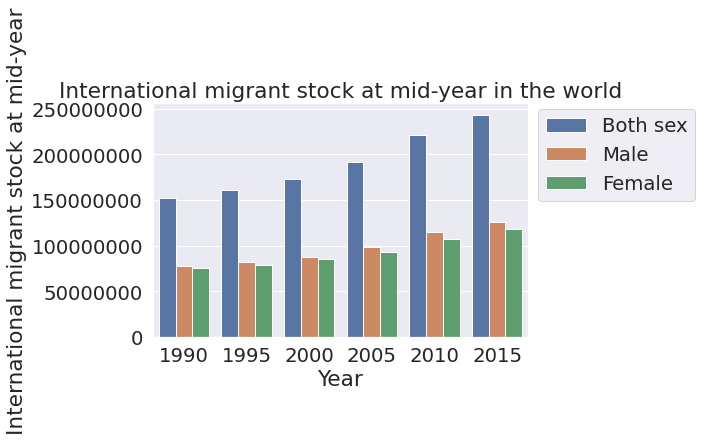

In [47]:
#create barplot,change plot size, set title
world_plot = sns.barplot(x = 'Year', y = 'International migrant stock at mid-year', hue = 'Gender', data = df_world)
world_plot.ticklabel_format(style='plain', axis='y')
world_plot.legend(bbox_to_anchor=(1, 1.02), loc='upper left')
world_plot.set_title("International migrant stock at mid-year in the world")
sns.set(font_scale = 1.5)

table 2

In [34]:
#select target group
df_world2 = (tpop2.loc[tpop2['Major area, region, country or area of destination'] == 'WORLD'])
df_world2

,Sort\norder,"Major area, region, country or area of destination",Notes,Country code,Total Population at mid-year(thousands),Year,Gender
0,1.0,WORLD,NaN,900.0,5309667.699,1990,Both sex
265,1.0,WORLD,NaN,900.0,5735123.084,1995,Both sex
530,1.0,WORLD,NaN,900.0,6126622.121,2000,Both sex
795,1.0,WORLD,NaN,900.0,6519635.85,2005,Both sex
1060,1.0,WORLD,NaN,900.0,6929725.043,2010,Both sex
1325,1.0,WORLD,NaN,900.0,7349472.099,2015,Both sex
1590,1.0,WORLD,NaN,900.0,2670423.701,1990,Male
1855,1.0,WORLD,NaN,900.0,2886635.893,1995,Male
2120,1.0,WORLD,NaN,900.0,3084537.662,2000,Male
2385,1.0,WORLD,NaN,900.0,3285082.249,2005,Male


Text(0.5, 1.0, 'Total Population at mid-year(thousands) in the world')

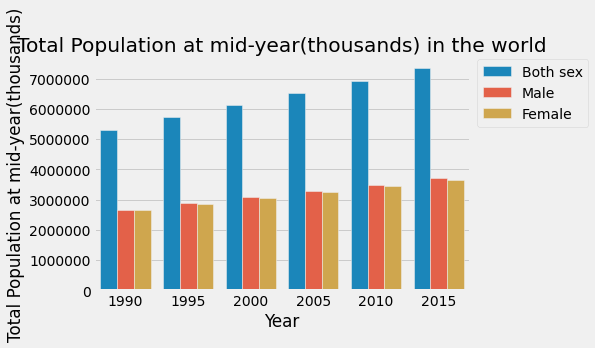

In [35]:
#create barplot,change plot size, set title
world_plot2 = sns.barplot(x = 'Year', y = 'Total Population at mid-year(thousands)', hue = 'Gender', data = df_world2)
world_plot2.ticklabel_format(style='plain', axis='y')
world_plot2.legend(bbox_to_anchor=(1, 1.02), loc='upper left')
world_plot2.set_title("Total Population at mid-year(thousands) in the world")

In [36]:
#create dataframe for each continent,combine together
Asia_df = (tpop2.loc[tpop2['Major area, region, country or area of destination'] == 'Asia'])
Europe_df = (tpop2.loc[tpop2['Major area, region, country or area of destination'] == 'Europe'])
Africa_df = (tpop2.loc[tpop2['Major area, region, country or area of destination'] == 'Africa'])
Oceania_df = (tpop2.loc[tpop2['Major area, region, country or area of destination'] == 'Oceania'])
Latin_America_and_the_Caribbean_df = (tpop2.loc[tpop2['Major area, region, country or area of destination'] == 'Latin America and the Caribbean'])
continents_df = [Africa_df, Asia_df,Europe_df, Oceania_df, Latin_America_and_the_Caribbean_df]
continents_df = pd.concat(continents_df)
continents_df

,Sort\norder,"Major area, region, country or area of destination",Notes,Country code,Total Population at mid-year(thousands),Year,Gender
6,7.0,Africa,NaN,903.0,631614.304,1990,Both sex
271,7.0,Africa,NaN,903.0,720416.386,1995,Both sex
536,7.0,Africa,NaN,903.0,814063.149,2000,Both sex
801,7.0,Africa,NaN,903.0,920238.945,2005,Both sex
1066,7.0,Africa,NaN,903.0,1044106.862,2010,Both sex
...,...,...,...,...,...,...,...
3624,180.0,Latin America and the Caribbean,NaN,904.0,245634.839,1995,Female
3889,180.0,Latin America and the Caribbean,NaN,904.0,265890.812,2000,Female
4154,180.0,Latin America and the Caribbean,NaN,904.0,284762.764,2005,Female
4419,180.0,Latin America and the Caribbean,NaN,904.0,303164.201,2010,Female


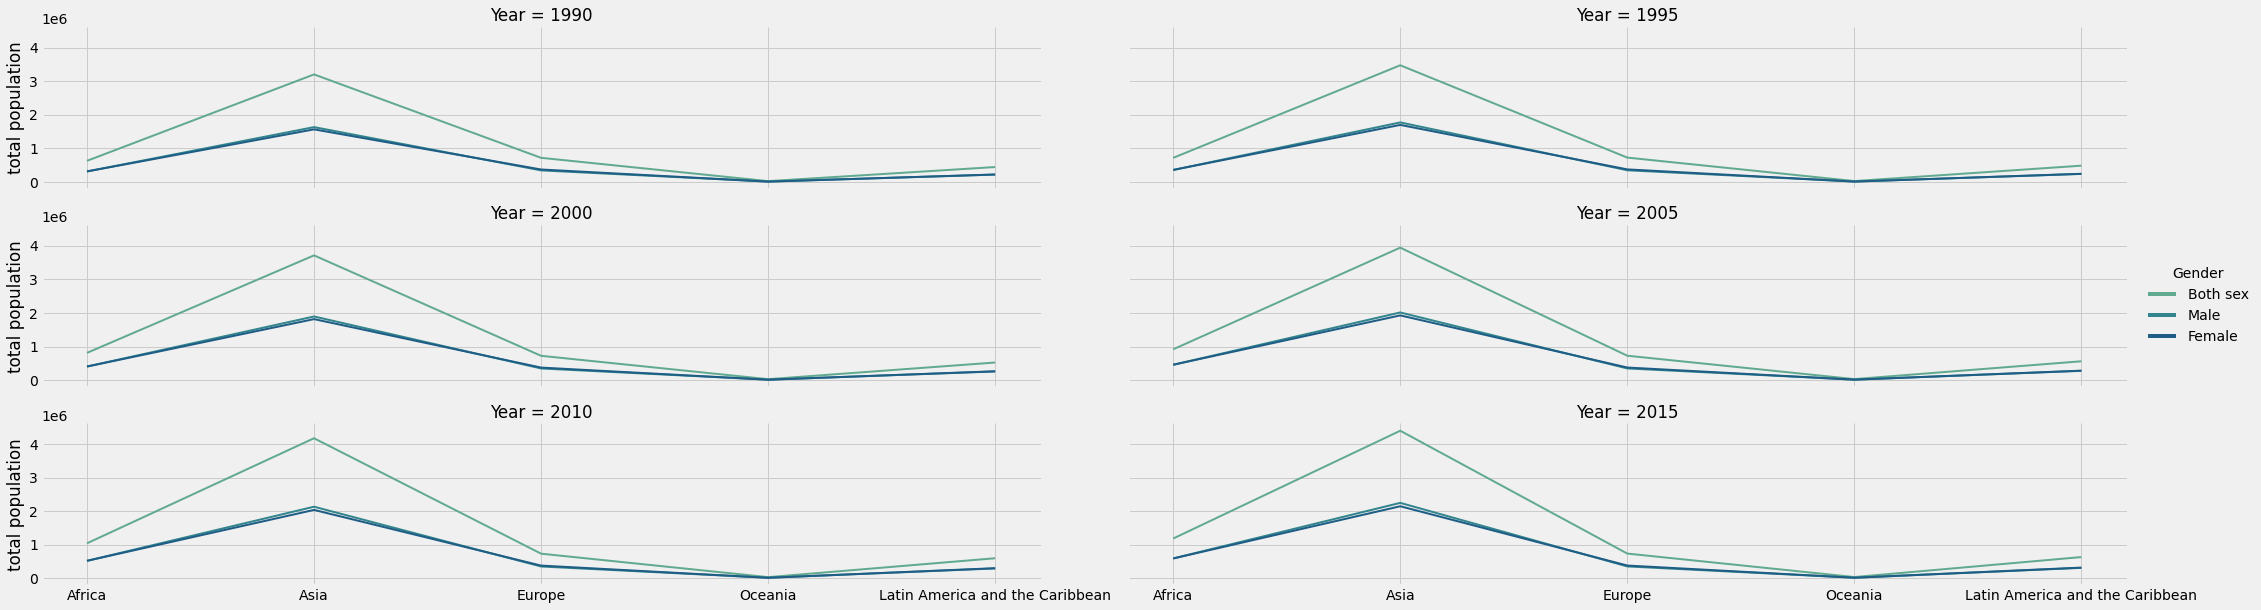

In [37]:
continent_plot = sns.relplot(
    data= continents_df,
    x="Major area, region, country or area of destination", y="Total Population at mid-year(thousands)", col="Year", hue="Gender",
     kind="line", palette="crest",linewidth=2, zorder=7,col_wrap=2, height=3, aspect=5)
continent_plot.set_axis_labels("", "total population")

table 3

In [38]:
#create a dataframe for each gender in world, combine together 
df3_world = (tper2.loc[tper2['Major area, region, country or area of destination'] == 'WORLD'])
df_pre_both = (df3_world.loc[df3_world['Gender'] == 'Both sex'])
df_pre_male = (df3_world.loc[df3_world['Gender'] == 'Male'])
df_pre_female = (df3_world.loc[df3_world['Gender'] == 'Female'])
df3_world = (df_pre_both, df_pre_male, df_pre_female)
df3_world = pd.concat(df3_world)
df3_world

,Sort\norder,"Major area, region, country or area of destination",Notes,Country code,Type of data (a),International migrant stock as a percentage of the total population,Year,Gender
0,1.0,WORLD,NaN,900.0,NaN,2.87331,1990,Both sex
265,1.0,WORLD,NaN,900.0,NaN,2.803806,1995,Both sex
530,1.0,WORLD,NaN,900.0,NaN,2.818899,2000,Both sex
795,1.0,WORLD,NaN,900.0,NaN,2.933739,2005,Both sex
1060,1.0,WORLD,NaN,900.0,NaN,3.199467,2010,Both sex
1325,1.0,WORLD,NaN,900.0,NaN,3.315888,2015,Both sex
1590,1.0,WORLD,NaN,900.0,NaN,2.91143,1990,Male
1855,1.0,WORLD,NaN,900.0,NaN,2.831583,1995,Male
2120,1.0,WORLD,NaN,900.0,NaN,2.849206,2000,Male
2385,1.0,WORLD,NaN,900.0,NaN,2.979124,2005,Male


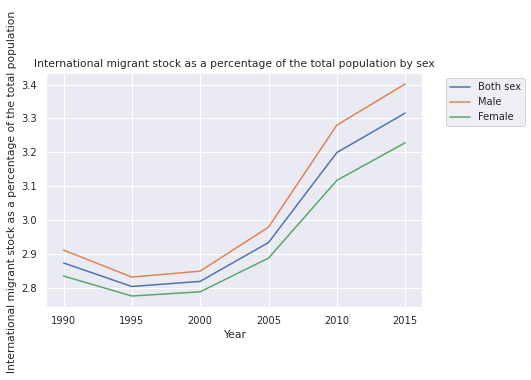

In [44]:
#make a line plot and set the plot size
World_IMS= sns.lineplot(data=df3_world, x="Year", y='International migrant stock as a percentage of the total population ', hue = 'Gender')
World_IMS.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
World_IMS.set_title("International migrant stock as a percentage of the total population by sex")
sns.set(font_scale = 1.2)

table 4

In [45]:
#create dataframe for each continent,combine together
Asia_df2 = (tFM2.loc[tFM2['Major area, region, country or area of destination'] == 'Asia'])
Europe_df2 = (tFM2.loc[tFM2['Major area, region, country or area of destination'] == 'Europe'])
Africa_df2 = (tFM2.loc[tFM2['Major area, region, country or area of destination'] == 'Africa'])
Oceania_df2 = (tFM2.loc[tFM2['Major area, region, country or area of destination'] == 'Oceania'])
Latin_America_and_the_Caribbean_df2 = (tFM2.loc[tFM2['Major area, region, country or area of destination'] == 'Latin America and the Caribbean'])
continents_df2 = [Asia_df2,Europe_df2,Africa_df2, Oceania_df2, Latin_America_and_the_Caribbean_df2]
continents_df2 = pd.concat(continents_df2)
continents_df2

,Sort\norder,"Major area, region, country or area of destination",Country code,Female migrants as a percentge of the internation migrant stock,Year,Gender
70,71.0,Asia,935.0,45.96873,1990,Female
335,71.0,Asia,935.0,45.867921,1995,Female
600,71.0,Asia,935.0,45.585271,2000,Female
865,71.0,Asia,935.0,44.567074,2005,Female
1130,71.0,Asia,935.0,42.038178,2010,Female
1395,71.0,Asia,935.0,41.99552,2015,Female
126,127.0,Europe,908.0,51.346887,1990,Female
391,127.0,Europe,908.0,51.486537,1995,Female
656,127.0,Europe,908.0,51.599165,2000,Female
921,127.0,Europe,908.0,51.750418,2005,Female


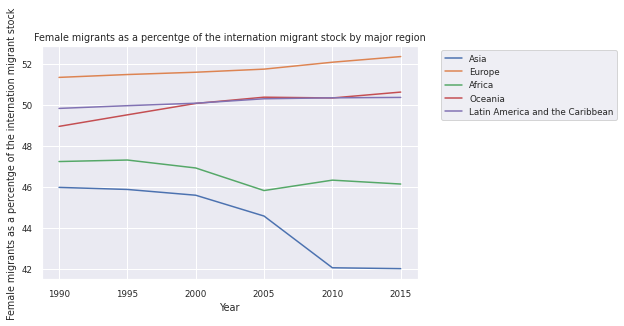

In [54]:
#make a line plot and set the plot size
world_female=sns.lineplot(x = 'Year', 
                         y = 'Female migrants as a percentge of the internation migrant stock', 
                         hue = 'Major area, region, country or area of destination',
                         data = continents_df2)
world_female.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
world_female.set_title("Female migrants as a percentge of the internation migrant stock by major region")
sns.set(font_scale = 0.5)

table 5

In [66]:
#select target group
df4_world = (tAR2.loc[tAR2['Major area, region, country or area of destination'] == 'WORLD'])
df4_world

,Sort\norder,"Major area, region, country or area of destination",Country code,Annal rate of change of the migrant stock,Year,Gender
0,1.0,WORLD,900.0,1.051865,1990-1995,Both sex
265,1.0,WORLD,900.0,1.428058,1995-2000,Both sex
530,1.0,WORLD,900.0,2.042124,2000-2005,Both sex
795,1.0,WORLD,900.0,2.95416,2005-2010,Both sex
1060,1.0,WORLD,900.0,1.890991,2010-2015,Both sex
1325,1.0,WORLD,900.0,1.000922,1990-1995,Male
1590,1.0,WORLD,900.0,1.450294,1995-2000,Male
1855,1.0,WORLD,900.0,2.151575,2000-2005,Male
2120,1.0,WORLD,900.0,3.159228,2005-2010,Male
2385,1.0,WORLD,900.0,1.912603,2010-2015,Male


Text(0.5, 1.0, 'Annual Rate of Change of Migrant Stock by Sex, From 1990-2015')

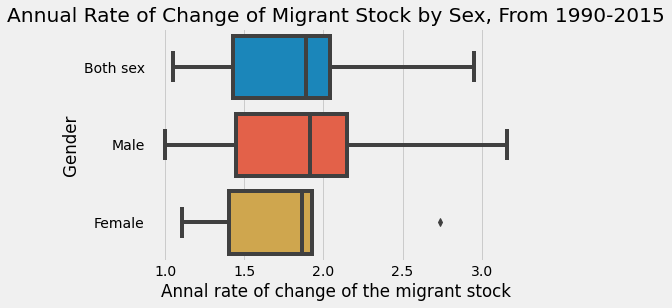

In [138]:
#make a line plot and set the plot title
world_An=sns.boxplot(data=df4_world, x="Annal rate of change of the migrant stock", y="Gender")
world_An.set_title('Annual Rate of Change of Migrant Stock by Sex, From 1990-2015')

table 6

In [39]:
#select target group
df5_world = (tEf2.loc[tEf2['Major area, region, country or area of destination'] == 'WORLD'])
df5_world

,Sort\norder,"Major area, region, country or area of destination",Country code,Estimated refugee tock at mid-year(both sex),Year,Gender
0,1.0,WORLD,900.0,18836571,1990,both sex
265,1.0,WORLD,900.0,17853840,1995,both sex
530,1.0,WORLD,900.0,15827803,2000,both sex
795,1.0,WORLD,900.0,13276733,2005,both sex
1060,1.0,WORLD,900.0,15370755,2010,both sex
1325,1.0,WORLD,900.0,19577474,2015,both sex


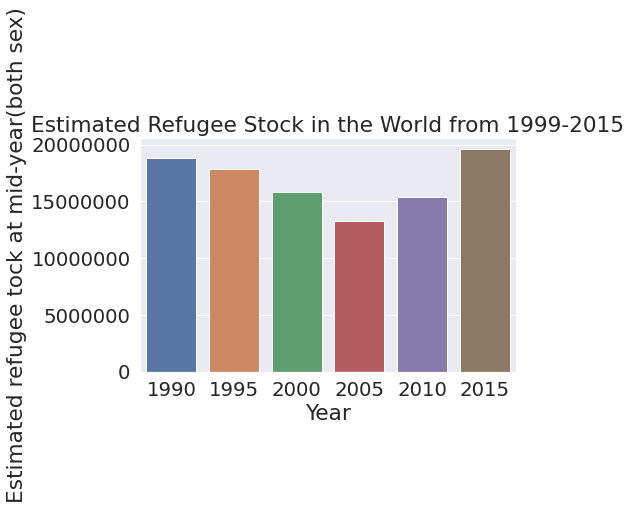

In [69]:
#make a bar plot and set the plot title, set the plot size
world_Ef = sns.barplot(x = 'Year', y = 'Estimated refugee tock at mid-year(both sex)', data = df5_world)
world_Ef.ticklabel_format(style='plain', axis='y')
world_Ef.set_title("Estimated Refugee Stock in the World from 1999-2015")
sns.set(font_scale = 1.8)

In [67]:
#select target group
df6_world = (tRe1.loc[tRe1['Major area, region, country or area of destination'] == 'WORLD'])
df6_world

,Sort\norder,"Major area, region, country or area of destination",Country code,Refugees a percentage of the international migrant stock,Year
0,1.0,WORLD,900.0,12.346732,1990
265,1.0,WORLD,900.0,11.103013,1995
530,1.0,WORLD,900.0,9.164736,2000
795,1.0,WORLD,900.0,6.941389,2005
1060,1.0,WORLD,900.0,6.932687,2010
1325,1.0,WORLD,900.0,8.033424,2015


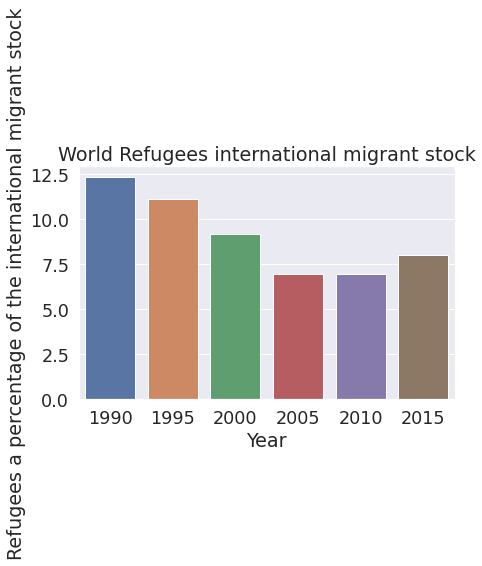

In [103]:
#make a bar plot and set the plot title
world_Re = sns.barplot(x = 'Year', y = 'Refugees a percentage of the international migrant stock', data = df6_world).set_title("World Refugees international migrant stock")

In [71]:
##create dataframe for each continent,combine together
Asia_df3 = (tRe1.loc[tRe1['Major area, region, country or area of destination'] == 'Asia'])
Europe_df3 = (tRe1.loc[tRe1['Major area, region, country or area of destination'] == 'Europe'])
Africa_df3 = (tRe1.loc[tRe1['Major area, region, country or area of destination'] == 'Africa'])
Oceania_df3 = (tRe1.loc[tRe1['Major area, region, country or area of destination'] == 'Oceania'])
Latin_America_and_the_Caribbean_df3 = (tRe1.loc[tRe1['Major area, region, country or area of destination'] == 'Latin America and the Caribbean'])
continents_df3 = [Asia_df3,Europe_df3,Africa_df3, Oceania_df3, Latin_America_and_the_Caribbean_df3]
continents_df3 = pd.concat(continents_df3)
continents_df3

,Sort\norder,"Major area, region, country or area of destination",Country code,Refugees a percentage of the international migrant stock,Year
70,71.0,Asia,935.0,20.640923,1990
335,71.0,Asia,935.0,17.052599,1995
600,71.0,Asia,935.0,18.595579,2000
865,71.0,Asia,935.0,15.194733,2005
1130,71.0,Asia,935.0,15.978369,2010
1395,71.0,Asia,935.0,17.599949,2015
126,127.0,Europe,908.0,2.685708,1990
391,127.0,Europe,908.0,5.196729,1995
656,127.0,Europe,908.0,4.058792,2000
921,127.0,Europe,908.0,2.747442,2005


Text(0.5, 1.0, 'Refugees a percentage of the international migrant stock by continents')

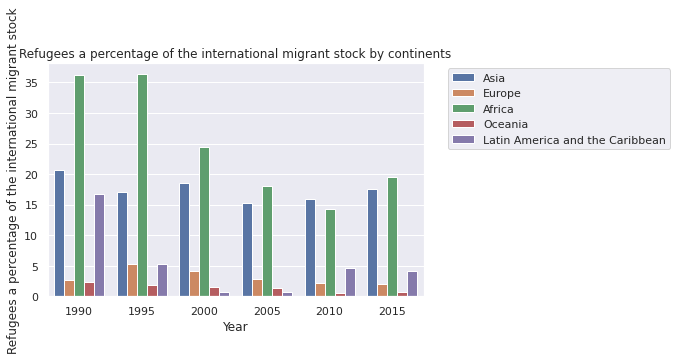

In [86]:
#make a bar plot, set the plot title and set plot size
continents_Re = sns.barplot(x = 'Year', y = 'Refugees a percentage of the international migrant stock', hue = 'Major area, region, country or area of destination',data = continents_df3)
continents_Re.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
continents_Re.set_title('Refugees a percentage of the international migrant stock by continents')

In [68]:
#select target group
df7_world = tAn1.loc [tAn1['Major area, region, country or area of destination'] == 'WORLD']
df7_world

,Sort\norder,"Major area, region, country or area of destination",Country code,Annual rate of change of the refugee stock,YearRange
0,1.0,WORLD,900.0,-2.123497,1990-1995
265,1.0,WORLD,900.0,-3.837069,1995-2000
530,1.0,WORLD,900.0,-5.557223,2000-2005
795,1.0,WORLD,900.0,-0.025089,2005-2010
1060,1.0,WORLD,900.0,2.947267,2010-2015


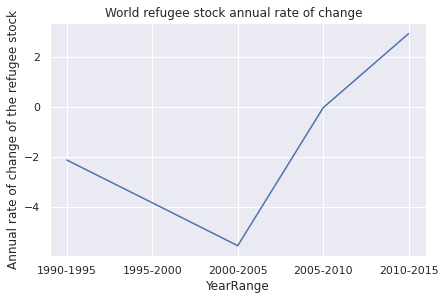

In [65]:
#make a bor plot, set the plot title, change plot size
world_Re = sns.lineplot(x = 'YearRange', y = 'Annual rate of change of the refugee stock', data = df7_world).set_title("World refugee stock annual rate of change  ")
sns.set(font_scale = 1.8)